In [2]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
city_data.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [4]:
ride_data = pd.read_csv(ride_data_to_load)
ride_data.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [5]:
# Combine the data into a single dataset
new_df = ride_data.merge(city_data, how="left")

In [7]:
# Display the data table for preview
new_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [13]:
#write new data to uniform csv
new_df.to_csv("new_data.csv", encoding='utf-8', index=False)

## Bubble Plot of Ride Sharing Data

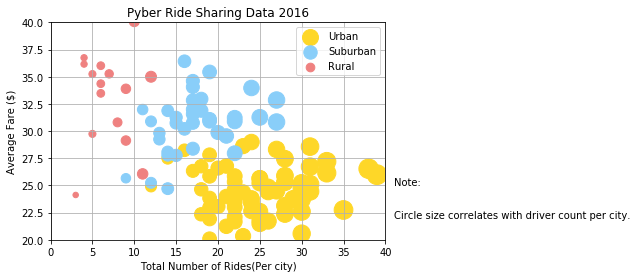

<Figure size 432x288 with 0 Axes>

In [10]:
x_urban = new_df[new_df["type"] =="Urban"]
x_urban_rides = x_urban.groupby(["city"]).count()["ride_id"]
x_urban_fare = x_urban.groupby(["city"]).mean()["fare"]
x_urban_drivers = x_urban.groupby(["city"]).count()["driver_count"]

x_suburban = new_df[new_df["type"] =="Suburban"]
x_suburban_rides = x_suburban.groupby(["city"]).count()["ride_id"]
x_suburban_fare = x_suburban.groupby(["city"]).mean()["fare"]
x_suburban_drivers = x_suburban.groupby(["city"]).count()["driver_count"]

x_rural = new_df[new_df["type"] =="Rural"]
x_rural_rides = x_rural.groupby(["city"]).count()["ride_id"]
x_rural_fare = x_rural.groupby(["city"]).mean()["fare"]
x_rural_drivers = x_rural.groupby(["city"]).count()["driver_count"]

plt.scatter(x_urban_rides,x_urban_fare, s=10*x_urban_drivers, marker="o",color="#FED728",label="Urban")
plt.scatter(x_suburban_rides,x_suburban_fare,s=10*x_suburban_drivers, marker="o",color="#89CEF9",label="Suburban")
plt.scatter(x_rural_rides,x_rural_fare,s=10*x_rural_drivers, marker="o",color="#EF8180",label="Rural")


# Incorporate the other graph properties
plt.xlabel("Total Number of Rides(Per city)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data 2016") 
plt.xlim(0,40)
plt.ylim(20,40)
# Create a legend
plt.legend(loc="upper right")
# Incorporate a text label regarding circle size
plt.text(41, 25,"Note:")
plt.text(41, 22,"Circle size correlates with driver count per city.")
plt.grid(True)
# Show Figure
plt.show()
# Save Figure
plt.savefig("scatter.png")


## Total Fares by City Type

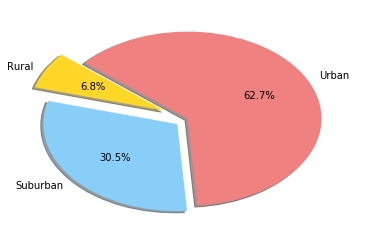

<Figure size 432x288 with 0 Axes>

In [100]:
# Calculate Type Percents
new_type = new_df.groupby(["type"])["fare"].sum()
new_type_df = pd.DataFrame({"Type Sum": new_type})
new_type_df.head()

# Build Pie Chart

fare_percent_labels = new_type_df.index.tolist()
fare_percent_percents = new_type_df["Type Sum"].tolist()
fare_percent_percents
colors = ["#FED728","#89CEF9","#EF8180"]
explode =(0.2,0.1,0)
plt.pie(fare_percent_percents, explode=explode, labels= fare_percent_labels, colors = colors, autopct="%1.1f%%", shadow=True, startangle=140)

# Show Figure
plt.show()

# Save Figure
plt.savefig("fare_percent_.png")


## Total Rides by City Type

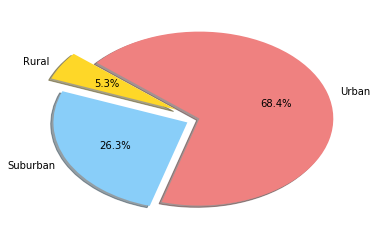

<Figure size 432x288 with 0 Axes>

In [99]:
# Calculate Ride Percents
new_type2 = new_df.groupby(["type"])["city"].count()
new_type_df2 = pd.DataFrame({"Ride Sum": new_type2})
new_type_df2.head()

# Build Pie Chart

ride_percent_labels = new_type_df2.index.tolist()
ride_percent_percents = new_type_df2["Ride Sum"].tolist()
ride_percent_percents
colors = ["#FED728","#89CEF9","#EF8180"]
explode =(0.2,0.1,0)
plt.pie(ride_percent_percents, explode=explode, labels= fare_percent_labels, colors = colors, autopct="%1.1f%%", shadow=True, startangle=140)

# Show Figure
plt.show()

# Save Figure
plt.savefig("ride_percent_.png")

## Total Drivers by City Type

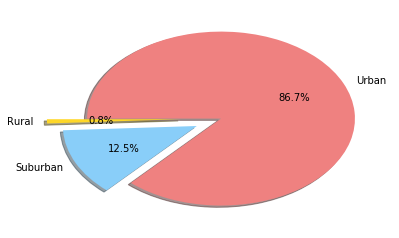

<Figure size 432x288 with 0 Axes>

In [98]:
# Calculate Driver Percents
new_type3 = new_df.groupby(["type"])["driver_count"].sum()
new_type_df3 = pd.DataFrame({"Driver Sum": new_type3})
new_type_df3.head()

# Build Pie Charts
total_drivers_labels = new_type_df3.index.tolist()
total_drivers_percents = new_type_df3["Driver Sum"].tolist()
total_drivers_percents
colors = ["#FED728","#89CEF9","#EF8180"]
explode =(0.3,0.2,0)
plt.pie(total_drivers_percents, explode=explode, labels= total_drivers_labels, colors = colors, autopct="%1.1f%%", shadow=True, startangle=180)
plt.show()

# Save Figure
plt.savefig("total_drivers_percent.png")